<a href="https://colab.research.google.com/github/austinjhunt/assign03-50-hunt/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5262 Homework 3 Assignment Description
## Deadline: Wednesday 6/1 11:59PM (CDT) This is extended

### I. Purpose:
Gain experience applying scikit learn to machine learning problems

### II. Grading and Submission
The assignment will be evaluated in a total of 60 points The assignment is in the form of a GitHub repository. Work must be completed by the deadline stated above.

### III. Tasks:
* Create a new repository using this repo as a template. Name your repo assign03-50-[lastname].  

* [10 POINTS] Create a new notebook name "churn-prediction", and properly document the notebook with descriptions of the tasks.

* [10 POINTS] Using the scikit-demo-solutions notebook as a guide, read in the HR data.

* [10 POINTS] Split the data for train and test

* [20 POINTS] Build an appropriate training pipeline.

* [10 POINTS] Carry out cross-validation

Import the necessary packages for the assignment.

In [1]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

###[10 POINTS] Read in the HR data.
Copy the link to the Excel file stored in the repo, and pass it as an argument to the pandas read_excel method to load in the data. 
Rather than having to [use GitHub API v3 to access the file on a private repo](https://stackoverflow.com/questions/62164400/how-to-access-private-github-repo-file-csv-in-python-using-pandas-or-requests), make the repo public. Otherwise you get a 404 when executing read_excel.

In [5]:
hr_data_download_url = 'https://github.com/austinjhunt/assign03-50-hunt/raw/main/IBM-HR-Data-Employee-Attrition.xlsx'
hr_data = pd.read_excel(hr_data_download_url)

### Explore the data
Display some of the data to become familiar with its current structure.

Display the first 5 records in the dataset.

In [6]:
display(hr_data.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Print some additional information about the dataset, 

In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

See how many null values exist for each of the columns / features in the dataset.

In [8]:
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Awesome! No null values! 

### [10 POINTS] Split the data for train and test
We need to separate our dataset into two subsets, a training dataset to allow our model to learn and discover churn patterns, and an unseen test dataset to verify that the model can accurately predict churn.  

In [13]:
class_column = 'Attrition'
hr_data[class_column]
# Controls the shuffling applied to the data before applying the split.
# Pass an int for reproducible output across multiple function calls.
random_seed = 1234
stratify = hr_data[class_column] # If not None, data is split in a stratified fashion, using this as the class labels.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(hr_data.drop(columns=class_column), hr_data[class_column], test_size=0.25, random_state=random_seed, stratify=stratify)

Verifying that everything looks okay. 
X training should be 1102 records (75% of data), x test should be 368 records (25% of data). Neither x test nor x x training should include the Attrition column. 

In [17]:
print(f'X training data dimensions {x_train.shape}') # should be 1102 records (75% of data)
print(f'X training data:')
display(x_train.head())

print(f'X testing data dimensions {x_test.shape}') # should be 368 records (25% of data)
print(f'X testing  data:')
display(x_test.head())

X training data dimensions (1102, 34)
X training data:


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
17,22,Non-Travel,1123,Research & Development,16,2,Medical,1,22,4,...,2,80,2,1,2,2,1,0,0,0
976,56,Travel_Rarely,1369,Research & Development,23,3,Life Sciences,1,1373,4,...,1,80,1,33,0,3,19,16,15,9
1357,42,Travel_Rarely,1396,Research & Development,6,3,Medical,1,1911,3,...,2,80,1,18,3,4,13,7,5,7
143,30,Travel_Rarely,438,Research & Development,18,3,Life Sciences,1,194,1,...,3,80,0,5,4,2,5,4,0,4
1435,44,Travel_Rarely,1037,Research & Development,1,3,Medical,1,2020,2,...,3,80,0,6,2,3,4,3,1,2


X testing data dimensions (368, 34)
X testing  data:


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1050,42,Travel_Frequently,748,Research & Development,9,2,Medical,1,1480,1,...,3,80,0,12,3,3,12,9,5,8
1345,35,Travel_Rarely,219,Research & Development,16,2,Other,1,1886,4,...,4,80,0,4,2,3,3,2,0,2
429,46,Travel_Rarely,1009,Research & Development,2,3,Life Sciences,1,575,1,...,3,80,0,26,2,1,3,2,0,1
924,35,Travel_Rarely,735,Research & Development,6,1,Life Sciences,1,1291,3,...,4,80,0,4,3,3,3,2,2,2
852,29,Travel_Rarely,1401,Research & Development,6,1,Medical,1,1192,2,...,1,80,1,10,5,3,10,8,0,8


Y training should have 1102 records (75% original data); Y test should have 368 records (25% original data). 



In [19]:
print(f'Y training data dimensions {y_train.shape}')
print(f'Y training data:')
display(y_train.head())

print(f'Y testing data dimensions {y_test.shape}')
print(f'Y testing  data:')
display(y_test.head())

Y training data dimensions (1102,)
Y training data:


17      No
976     No
1357    No
143     No
1435    No
Name: Attrition, dtype: object

Y testing data dimensions (368,)
Y testing  data:


1050    No
1345    No
429     No
924     No
852     No
Name: Attrition, dtype: object

Out of curiosity, want to know the ratio of Yes / No in both Y training and Y testing datasets. 

In [25]:
y_train.value_counts()

No     924
Yes    178
Name: Attrition, dtype: int64

In [26]:
y_test.value_counts()

No     309
Yes     59
Name: Attrition, dtype: int64

### [20 Points] Time to build the pipeline. 
Now I'm going to build the training pipeline for the models. This is something we need to repeat multiple times so it's good to modularize the code. DRY, right? 

At this stage, we could impute any values that were missing, but there were actually no null values in the original data. Another thing we can do here is encode categorical values. 

In [28]:
# create individual pipelines for different data types (categorical 
# (e.g. education field) vs numerical (e.g. distance from home))
# There is no need for an imputation step in either pipeline 
# since we confirmed that there were no null values. 
categorical_pipeline = Pipeline(
    steps=[('onehot_cat', OneHotEncoder(drop='if_binary'))]
)
numerical_pipeline = Pipeline(
    steps=[('scale_num', StandardScaler())]
)

#### Preprocessing Pipeline
Transform raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. 

This is a pipeline that will organize the columns into categorical vs numerical types, and pipe the respective groups into their corresponding pipelines that were set up above.

In [29]:
# Establish preprocessing pipeline by columns 

preprocessing_pipeline = ColumnTransformer([
                                            ('categorical_pipeline', categorical_pipeline, make_column_selector(dtype_include=object)),
                                            ('numerical_pipeline', numerical_pipeline, make_column_selector(dtype_include=np.number)), 
], remainder='passthrough')



#### Now for the whole pipeline
We have our preprocessing pipeline organizing / transforming the columns and piping them into their correct pipelines (categorical vs numerical). Now we need a parent pipeline for the preprocessing pipeline. 


In [32]:
whole_pipeline = Pipeline(steps=[
                        ('preprocessing_pipeline', preprocessing_pipeline),
                        ('model', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))
                        ])

#### Visualization of Pipeline

In [33]:
#visualization of the pipeline steps 
with config_context(display='diagram'):
    display(whole_pipeline)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e9311510>),
                                                 ('numerical_pipeline',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e9246050>)])),
                ('model',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

### [10] Cross-validation with hyperparameter tuning. (with extra comparison of random search vs grid search algorithms)
We now have our pipelines set up, so we want to evaluate the model's performance. Definition pulled from Wikipedia: 
*Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set*


Hyperparameter tuning is one of the most important parts of a machine learning pipeline. Why should we tune the hyperparameters of a model? Because we don’t really know their optimal values in advance. A model with different hyperparameters is, actually, a different model so it may have a lower performance. 

#### Grid search
**Grid search** is the simplest algorithm for hyperparameter tuning. With this algorithm, we start by dividing the domain of the hyperparameters into a discrete grid. Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation. The point of the grid that maximizes the average value in cross-validation, is the optimal combination of values for the hyperparameters.

In [48]:
from sklearn import pipeline
tuning_grid = {
    'model__l1_ratio': np.linspace(0,1,5),
    'model__C': np.logspace(-1, 6, 3)
}
grid_search = GridSearchCV(whole_pipeline, param_grid = tuning_grid, cv=5, verbose=1, return_train_score=True)  

In [49]:
tuning_grid

{'model__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
 'model__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])}

#### How fitting. 
We now call the fit() method on the grid search object. When we do this, Python will actually test all combinations of the values in the lists above from the tuning grid and will pick the combination producing the highest score. This could take some time.

In [57]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing_pipeline',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical_pipeline',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(drop='if_binary'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e9311510>),
                                                                        ('numerical_pipeline',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                     

From the output above, we can see that the grid search has done 75 fits. Here is how we can identify the best combination found as well as the best score that was achieved by that combination.

In [58]:
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e66c8e50>),
                                                 ('numerical_pipeline',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e66c8890>)])),
                ('model',
                 LogisticRegression(C=316.22776601683796, l1_ratio=1.0,
                          

#### Random search. 
I want to try a random search as well (an alternative to the grid search algorithm for hyperparameter tuning). With random search, it's similar to grid search, but rather than using the whole grid, the algorithm only tests a randomly selected subset of the points/combinations on the grid. Smaller subset means less accuracy, but faster processing. The larger the subset, the closer to an actual grid search (since the whole set is all points on the grid and thus implies a grid search). 
##### When to use?
According to [this resource](https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/), random search hyperparameter tuning can be useful when you have many hyperparameters with a fine-grained grid of values, since this would produce a nightmarishly complex grid search algorithm. 


In [52]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
random_search = RandomizedSearchCV(
    whole_pipeline, param_distributions=tuning_grid, cv=5, verbose=1, return_train_score=True
)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing_pipeline',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical_pipeline',
                                                                               Pipeline(steps=[('onehot_cat',
                                                                                                OneHotEncoder(drop='if_binary'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e9311510>),
                                                                              ('numerical_pipeline',
                                                                               Pipeline(steps=[('scale_num',
                                                                                              

First, notice that it only totalled 50 fits, rather than 75 fits as with the grid search. 
Let's see how random search performed compared to grid search. 


In [55]:
random_search.best_params_
random_search.best_score_

0.8820403126285479

Pretty much exactly the same, but slightly worse (.8829 with Grid, .8820 with Random). As you would expect. 

Let's proceed forward using the grid search results.

### Variable importance
Here, we can assess the importance in the selected model to reveal any potential (usable/actionable) insights about the original data. 

We can use the .classes_ attribute of the grid search object to display the list of classes in the data (the class of a record is what we hope to predict about that record).

In [59]:
grid_search.classes_

array(['No', 'Yes'], dtype=object)

### Best Estimator
We want to begin collecting information from this point from the model that performed the best, which we can obtain from the `grid_search.best_estimator_` attribute!

In [71]:
best_estimator_pipeline = grid_search.best_estimator_
best_estimator_pipeline

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e66c8e50>),
                                                 ('numerical_pipeline',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f96e66c8890>)])),
                ('model',
                 LogisticRegression(C=316.22776601683796, l1_ratio=1.0,
                          

In [73]:
model = best_estimator_pipeline['model']
model

LogisticRegression(C=316.22776601683796, l1_ratio=1.0, penalty='elasticnet',
                   solver='saga', tol=0.01)

#### Coefficients
Coefficients represent the relationship between a given feature X and the target Y assuming all other features remain constant. 
Let's obtain the coefficients of the features in the decision function used by the best estimator pipeline's model.

In [76]:
# .coef_ gives coefficient of the features in the decision function.
model.coef_ 

array([[-1.41952614,  0.63616653, -0.2323108 , -0.23328684, -0.74635592,
        -0.03189125,  0.02811561, -0.29511134, -0.01469757, -0.6614345 ,
        -0.45959132,  0.38912233,  0.32509078, -0.45280071,  0.08545312,
         1.02487651, -0.40848471, -0.78879053, -0.8655333 ,  0.0214759 ,
        -0.05944241,  0.43376785, -1.03983214, -0.49415161,  0.51834157,
        -1.01567169,  1.869014  , -0.29645391, -0.11538969,  0.30133802,
        -0.16918493,  0.        , -0.0283568 , -0.45253065,  0.03968132,
        -0.33404231, -0.13635701, -0.3406428 , -0.00786779, -0.05982368,
         0.44606964,  0.06357257, -0.08226345, -0.20917304,  0.        ,
         0.03035557, -0.42202488, -0.18623937, -0.25833186,  0.52537603,
        -0.43313329,  0.54756491, -0.48438909]])

In [77]:
# This returned a nested array. We want that first nested array element. Let's call it vip
vip = model.coef_[0]
vip

array([-1.41952614,  0.63616653, -0.2323108 , -0.23328684, -0.74635592,
       -0.03189125,  0.02811561, -0.29511134, -0.01469757, -0.6614345 ,
       -0.45959132,  0.38912233,  0.32509078, -0.45280071,  0.08545312,
        1.02487651, -0.40848471, -0.78879053, -0.8655333 ,  0.0214759 ,
       -0.05944241,  0.43376785, -1.03983214, -0.49415161,  0.51834157,
       -1.01567169,  1.869014  , -0.29645391, -0.11538969,  0.30133802,
       -0.16918493,  0.        , -0.0283568 , -0.45253065,  0.03968132,
       -0.33404231, -0.13635701, -0.3406428 , -0.00786779, -0.05982368,
        0.44606964,  0.06357257, -0.08226345, -0.20917304,  0.        ,
        0.03035557, -0.42202488, -0.18623937, -0.25833186,  0.52537603,
       -0.43313329,  0.54756491, -0.48438909])

Get the names of the categorical columns.

In [79]:
categorical_names = grid_search.best_estimator_.named_steps['preprocessing_pipeline'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
categorical_names


array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Over18_Y', 'OverTime_Yes'], dtype=object)

Get the names of the numerical columns. 


In [80]:
numerical_names = grid_search.best_estimator_.named_steps['preprocessing_pipeline'].transformers_[1][2]
numerical_names

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Create a data frame with the vip info (information about the coefficients from the best estimator model)

In [85]:
coefficient_info = pd.DataFrame(
    {'feature_names': np.hstack([categorical_names, numerical_names]), 'vip': vip}
)
# get sign and magnitude information
coefficient_info = coefficient_info.assign(coefficient_magnitude = abs(coefficient_info['vip']),
                                           coefficient_sign = np.sign(coefficient_info['vip']))



### Plotting time! Yay!


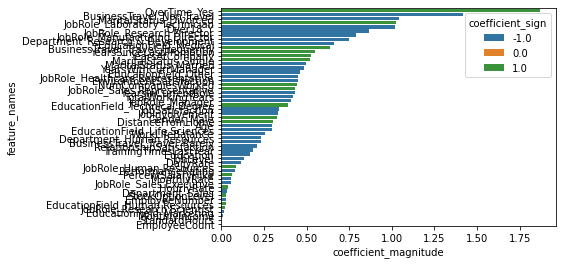

In [86]:
coefficient_info = coefficient_info.set_index('feature_names').sort_values(by='coefficient_magnitude', ascending=False)
sns.barplot(y=coefficient_info.index, x='coefficient_magnitude', hue='coefficient_sign', data=coefficient_info, orient='h', dodge=False)